# Data Wrangling - Twitter archive

## TABLE OF CONTENTS
><li>Introduction </li> 
><li>Gathering</li>
><li>Assessing</li>
><li>Cleaning</li>
><li>Storing</li>
><li>Analysing </li>

## Introduction

> We Rate Dogs is a popular twitter handle which has over 8million followers and rates the dogs based on various characteristics and upload their photos on it's twitter handle.

> In this project we will filter the twitter handle's tweets and make it basis of the analysis.We will wrangle the data by gathering assesing and cleaning the dataset and convert it into a tidy dataset to form visualisation.

## Gathering

> In this first step we will collect the data from three different sources :- import from csv file,import from url with requests library and import the data from the tweepy api.

> We will import the necessary modules,load the csv file provided to us in the dataframe and display a few lines of the dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import wptools
import os
import requests
import numpy as np
import re

In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> We will import the tweepy api with the help of the key and secret token provided to us.

> We will also import the json file with all the details from the Twitter page and parse the following set of datas from the file to a newly created list which will in turn be used to create a new dataframe.

> We will also post a few beginning rows of the new dataframe.

In [3]:

import tweepy

consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


from timeit import default_timer as timer
tweet_ids=list(df1.tweet_id)
tweet_data = {}
fails_dict = {}
start = timer()
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        tweet_data[str(tweet_id)] = tweet_status._json
    except tweepy.TweepError as e:
        #print("Error for: " +str(tweet_id))
        fails_dict[str(tweet_id)] = e

end = timer()
print(end - start)
print(fails_dict)


import json
#Writing the data into text file
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)


#Reading the text file in json format
with open('tweet_json.txt') as file:
    data = json.load(file)
    

tweets_info_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favourites = data[tweet_id]['favorite_count']
    followers = data[tweet_id]['user']['followers_count']
    friends = data[tweet_id]['user']['friends_count']
    tweets_info_list.append({'tweet_id': tweet_id, 'retweets' : retweets,
                             'favorites': favourites
                             ,
                            'followers' : followers
                             , 
                             'friends' : friends
                            })


df3 = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])
df3.head()


400.48546473999977
{'888202515573088257': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '873697596434513921': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '872668790621863937': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '872261713294495745': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '869988702071779329': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '866816280283807744': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '861769973181624320': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '856602993587888130': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '851953902622658560': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '845459076796616705': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '844704788403113984'

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7726,36300,8772415,15
1,892177421306343426,5718,31304,8772415,15
2,891815181378084864,3787,23576,8772415,15
3,891689557279858688,7889,39601,8772415,15
4,891327558926688256,8506,37816,8772415,15


> We will save the link from which the tsv file is to be downloaded in a variable and name it url.

> We will use the get function from the requests library to fetch the tsv file from the internet.

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
response = requests.get(url)

> As the type of response file does not allow it to read into a csv file,we will write the contents of the tsv file stored in the requests module function type into a file.

> We will load the tsv file into the dataframe by using the 'tab' as separator and print few lines of the dataframe

In [6]:
with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)


In [7]:
# Read the downloaded file into a dataframe 'images'
images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> We have now gathered all the required and necessary data and now proceed to the assessing part.

## ASSESSING

### Visual Assessment

In [8]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
df3

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7726,36300,8772415,15
1,892177421306343426,5718,31304,8772415,15
2,891815181378084864,3787,23576,8772415,15
3,891689557279858688,7889,39601,8772415,15
4,891327558926688256,8506,37816,8772415,15
5,891087950875897856,2850,19049,8772415,15
6,890971913173991426,1855,11093,8772415,15
7,890729181411237888,17247,61177,8772415,15
8,890609185150312448,3925,26207,8772415,15
9,890240255349198849,6717,29956,8772415,15


> We have now gathered a visual assessment of the following data and understood the basic overall structure of our data.

## Programming assessment

> We will check the number of columns present in the dataframe and find out which coloumns have missing rows and the type of data in the rows.

> We will check the data again from the end and try to get a good understanding of the data again.

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


> We observed that the expanded_urls column has few missing values in the dataframe.We will print all those rows.

In [13]:
df1[df1.expanded_urls.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [14]:
df1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

> We will print the type of timestamp as we have already observed that it should be in datetime format but instead it is in string format.

In [15]:
print("Data type for timestamp:  " + str(type(df1.timestamp[0])))

Data type for timestamp:  <class 'str'>


> We will do more in depth research about the data and check for any outliers present in the dataframe.

In [16]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> We observed from the above table that the maximum for both rating_numerator and rating_denominator is very much more than the normal values.

> We also saw that the minimum for the denominator is 0 which is not the desired value as we have gathered the insight from observing the data that the rating_denominator should be 10.

> We will check for all the values which are beyond the normal values.

In [17]:
df1[df1.rating_denominator<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [18]:
df1[df1.rating_denominator>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


> We gathered the insight from observing that the numerator should be within the range of 20.Anything beyond that is undesirable.

In [19]:
df1[df1.rating_numerator>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


> We will check for any duplicate values present in the dataframe.

In [20]:
sum(df1.duplicated())

0

> The data should be studied more so that we can gain more insights on the data and decide which areas are to cleaned.

In [21]:
df1.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,None,None,pupper,None
1181,719332531645071360,NaN,NaN,2016-04-11 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719332531...,11,10,Pippa,None,None,None,None
527,808733504066486276,NaN,NaN,2016-12-13 18:01:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper in a onesie. Quite pupset abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808733504...,12,10,None,None,None,pupper,None
555,803692223237865472,NaN,NaN,2016-11-29 20:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I present to you... Dog Jesus. ...,6.914169e+17,4.196984e+09,2016-01-25 00:26:41 +0000,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
1851,675710890956750848,NaN,NaN,2015-12-12 16:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He was just told that he couldn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675710890...,12,10,Lenny,None,None,None,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
1749,679047485189439488,NaN,NaN,2015-12-21 21:15:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679047485...,9,10,None,None,None,None,None
1750,679001094530465792,NaN,NaN,2015-12-21 18:10:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,NaN,NaN,NaN,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. He's sexually confused. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,None,None,None,None


> We noticed that there are some values in the name column of the database which are not names but articles and other english words such as a,the,such,etc.

> One more observation was made that in each case of original names the first letter is always capitalised,So we can print all those rows which do not start with capitalised letters using regular expressions.

In [22]:
df1[df1.name.str.contains('^[a-z]', regex = True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


> The number of unique source must be checked so to ensure that the source entered value is correct and not wrong.

In [23]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> From further observation we noticed that in the text field there is &amp used instead of & symbol.We will print all such rows.

In [24]:
df1[df1.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


> We will now programmicatically check the number of rows and colums along with the types of every column.

In [25]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> We will also study more about the data by checking for the outliers and the mean,min and max of each column.

In [26]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> We saw that the max value of p.conf has a max value of 1 which is quite odd so we will check which prediction does it point to.

In [27]:
images[images.p1_conf==1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


> We will find out the different types of img_num values present in the dataframe to check whether there are any wrong numbers present or not.

In [28]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [29]:
images.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador_retriever,0.475552,True,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
1600,799757965289017345,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,Border_collie,0.442534,True,collie,0.288684,True,Shetland_sheepdog,0.196399,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
625,680798457301471234,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,1,ram,0.499761,False,hog,0.283795,False,ox,0.067455,False
1316,755110668769038337,https://pbs.twimg.com/ext_tw_video_thumb/75511...,1,Labrador_retriever,0.708974,True,golden_retriever,0.114314,True,Great_Pyrenees,0.065813,True
1366,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False
1592,798673117451325440,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False


> We will check if there are any duplicated rows present in the dataframe.

In [30]:
sum(images.duplicated())

0

> We will check if any of the image url is duplicated  or not in the dataframe.

In [31]:
images[images.jpg_url.duplicated()].jpg_url.values

array([ 'https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg',
       'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg',
       'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg',
       'https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg',
       'https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg',
       'https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg',
       'https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg',
       'https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg',
       'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg',
       'https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg',
       'https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg',
       'https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg',
       'https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg',
       'https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg',
       'https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg',
       'https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg',
       'https://pbs

> As we can see from the above observation that there are too many duplicate image urls so we will check all the rows with duplicated image urls.

In [32]:
images[images.jpg_url.apply(lambda x: x in images[images.jpg_url.duplicated()].jpg_url.values)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


> We will now check the rows and columns count of the dtaframe created from the tweepy api info and check for any problems in the data.

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 5 columns):
tweet_id     877 non-null object
retweets     877 non-null int64
favorites    877 non-null int64
followers    877 non-null int64
friends      877 non-null int64
dtypes: int64(4), object(1)
memory usage: 34.3+ KB


In [34]:
df3.describe()

,retweets,favorites,followers,friends
count,877.000000,877.000000,8.770000e+02,877.0
mean,4760.057013,13909.835804,8.772424e+06,15.0
std,5360.373487,14615.606662,7.887244e+01,0.0
min,1.000000,0.000000,8.772414e+06,15.0
25%,1978.000000,5252.000000,8.772415e+06,15.0
50%,3254.000000,10606.000000,8.772416e+06,15.0
75%,5576.000000,19500.000000,8.772416e+06,15.0
max,56936.000000,133453.000000,8.773124e+06,15.0


> We will check for any duplicated rows present in the dataframe and try to understand the data more by checking the values present in it.

In [35]:
sum(df3.duplicated())

0

In [36]:
df3.sample(50)

,tweet_id,retweets,favorites,followers,friends
219,848213670039564288,722,8098,8772416,15
177,856330835276025856,646,0,8772417,15
38,884876753390489601,5111,26199,8772415,15
227,847251039262605312,4264,20343,8772416,15
193,853760880890318849,5581,27991,8772417,15
407,821765923262631936,1685,8553,8772416,15
849,761599872357261312,1200,4170,8772414,15
110,870656317836468226,2453,11738,8772416,15
152,860981674716409858,2038,0,8772416,15
422,820013781606658049,1201,0,8772416,15


> We have finally assessed all the dataframes and now we will proceed to the cleaning part.

## Assessment Summary

### Quality Issues

#### DF1:-

> **1.>** The type of the timestamp column is string instead of datetime it should be converted to datetime datatype.

>**2.>** We observed that there are few missing rows in the expanded_urls column and we will fill the missing values appropriately.

>**3.>** There are rows where the numerator and denominator are out of range and we will try to fix that.

>**4.>** We observed that the source column has links in it while it should be present in more understandable way which a human can easily read.

>**5.>** The text column contains a few rows where &amp; is written instead of & symbol,these should be replaced.

>**6.>** The name column has a few rows where instead of names articles such as a,the,such,an are used thewse names should be replaced with Not available option.

#### DF3:-

>**1.>** The type of the tweet_id column is object it shouyld be converted to the int datatype.

#### images:-

>**1.>** The predictions have _ joining them which should be replaced with a whitespace character and the first word of each prediction should be capitalized.

>**2.>** The column names should be more understandable and hence we should rename the columns to more simpler names.

### Tidiness:-

#### DF1:-

>**1.>** There are 4 columns for the dog stages namely doggo, floofer, pupper and puppo. These 4 columns should be substituted for one variable.

>**2.>** We are only interested in the tweet id so we should drop the columns with retweet ionformation like retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### DF3:-

>**1.>** The table with the json data should be combined with the tweet data based on the tweet_id column.

## CLEANING

In this step first we will define the problem then write the code and run it and in the end test the code to see the functionality whether the issue has been resolved or not.

> We will now start off by correcting the first dataframe which contained the tweet data.
> We will copy the dataframe and create a new one and try to analyse the data types and data again.

In [37]:
tweet_data=df1.copy()

In [38]:
tweet_count=df3.copy()

In [39]:
image_prediction=images.copy()

In [40]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> As we observed that the timestamp datatype is string we will convert it into datetime format.

In [41]:
tweet_data['timestamp'] = pd.to_datetime(tweet_data.timestamp)

> We will confirm the type of timestamp.

In [42]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

> We will drop all the unneccessary columns not required as we have found that our analysis has no use of the retweet id's. 

> We will also check the information of all the columns again so as to check whether the columns were dropped or not.

In [43]:
tweet_data = tweet_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [44]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


> As we have observed from the examination that the expanded url consists of the https://twitter.com/dog_rates/status/ follwowed by it's tweet id so we will fill the column like this

In [45]:
tweet_data.expanded_urls = 'https://twitter.com/dog_rates/status/' + tweet_data.tweet_id.astype(str)

> We will check if the expanded urls were filled or not.

In [46]:
tweet_data[tweet_data.expanded_urls.isnull() == True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> We have observed that the denominator should be 10 but is not so these will be manually cleaned by reading the rating from the text column.

In [47]:
pd.set_option('display.max_colwidth', 200)
tweet_data[['text', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10')

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [48]:
tweet_data.loc[313, 'rating_numerator':'rating_denominator'] = [13, 10]

tweet_data.loc[784, 'rating_numerator':'rating_denominator'] = [14, 10]

tweet_data.loc[1068, 'rating_numerator':'rating_denominator'] = [14, 10]

tweet_data.loc[1165, 'rating_numerator':'rating_denominator'] = [13, 10]

tweet_data.loc[1202, 'rating_numerator':'rating_denominator'] = [11, 10]

tweet_data.loc[1662, 'rating_numerator':'rating_denominator'] = [10, 10]

tweet_data.loc[2335, 'rating_numerator':'rating_denominator'] = [9, 10]

> We will correct the denominator and numerator manually after checking the correct values from the text column. We will drop the rest of rows where the values can not be corrected.

In [49]:
tweet_data = tweet_data.drop([342, 433, 516, 902, 1274,1351,1598,1634,1663,1779,1120,1228,1254,1433,1635,1843], axis = 0)

In [50]:
tweet_data.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> We will follow the above steps and check for the wrong numerator values.

In [51]:
pd.set_option('display.max_colwidth', 200)
tweet_data[['text', 'rating_numerator', 'rating_denominator']].query('rating_numerator > 20')

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10


In [52]:
tweet_data.loc[340, 'rating_numerator':'rating_denominator'] = [9.75, 10]

tweet_data.loc[695, 'rating_numerator':'rating_denominator'] = [9.75, 10]

tweet_data.loc[763, 'rating_numerator':'rating_denominator'] = [11.27, 10]

tweet_data.loc[1712, 'rating_numerator':'rating_denominator'] = [11.26, 10]

In [53]:
tweet_data = tweet_data.drop([188,189,290,979,2074], axis = 0)

In [54]:
tweet_data.query('rating_denominator > 20')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> As we saw above that there are 4 coloumns instead of 1 we will replace the none values with whitespace character and then concatinate all of these to form 1 column.

In [55]:
tweet_data.doggo=tweet_data.doggo.replace('None','')
tweet_data.floofer=tweet_data.floofer.replace('None','')
tweet_data.pupper=tweet_data.pupper.replace('None','')
tweet_data.puppo=tweet_data.puppo.replace('None','')

In [56]:
tweet_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193,13.0,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426,13.0,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12.0,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13.0,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256,12.0,10,Franklin,,,,


In [57]:
tweet_data['stage']=tweet_data.doggo.str.cat(tweet_data.floofer).str.cat(tweet_data.pupper).str.cat(tweet_data.puppo)
tweet_data=tweet_data.drop(['doggo','floofer','pupper','puppo'],axis=1)
tweet_data.stage=tweet_data.stage.replace('',np.nan)

> We have seen that there are few rows where the stage has multiple values we will replace those values and make them one.

In [58]:
tweet_data.stage.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

In [59]:
tweet_data.stage=tweet_data.stage.replace('doggopuppo','multiple')

In [60]:
tweet_data.stage=tweet_data.stage.replace('doggofloofer','multiple')

In [61]:
tweet_data.stage=tweet_data.stage.replace('doggopupper','multiple')

> We will now check whether we have successfully replaced the values successfully as multiple or not. 

In [62]:
tweet_data.stage.value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: stage, dtype: int64

> We have noticed that the values are in the form of links so we should convert them into more easily readable format.

In [63]:
tweet_data.source = tweet_data.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iPhone')
tweet_data.source = tweet_data.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
tweet_data.source = tweet_data.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Website')
tweet_data.source = tweet_data.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')


> We will check whether the values are more understandable.

In [64]:
tweet_data.source.value_counts()

iPhone             2201
Vine                 91
Twitter Website      33
TweetDeck            10
Name: source, dtype: int64

> We will replace the &amp in the text column with & symbol.

In [65]:
tweet_data['text'] = tweet_data['text'].str.replace('&amp;', '&')

> we will check whether there are any rows left with &amp written in the text column.

In [66]:
tweet_data[tweet_data.text.str.contains('&amp;')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


> We will replace the extra names present in the names column with the value with Not available.

In [67]:
tweet_data.loc[tweet_data.name.str.contains('^[a-z]', regex = True), 'name'] = "Not available"

> we will check whether there are any rows left with articles written instead of names in the name column.

In [68]:
tweet_data[tweet_data.name.str.contains('^[a-z]', regex = True)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


> We have observed that the tweet id datatype of the tweet_data is int but ideally it should be a string as we are not supposed to perform mathematical operations on them and they need to be very large numbers so we will convert the tweet_id datatype to string.

In [69]:
tweet_data.tweet_id=tweet_data.tweet_id.astype(str)

In [70]:
tweet_data.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator             int64
name                          object
stage                         object
dtype: object

> We will now merge both the dataframes into one on tweet id.

In [71]:
tweet_final = pd.merge(tweet_data, tweet_count, on = 'tweet_id', how = 'left')

> Check whether the merge done was successful.

In [72]:
tweet_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 13 columns):
tweet_id              2335 non-null object
timestamp             2335 non-null datetime64[ns]
source                2335 non-null object
text                  2335 non-null object
expanded_urls         2335 non-null object
rating_numerator      2335 non-null float64
rating_denominator    2335 non-null int64
name                  2335 non-null object
stage                 380 non-null object
retweets              871 non-null float64
favorites             871 non-null float64
followers             871 non-null float64
friends               871 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 255.4+ KB


> We will now replace the underscores( _ ) with the whitespace character and capitalize the first letter of each prediction from the image prediction dataframe. 

In [73]:
image_prediction.p1 = image_prediction.p1.str.replace('_', ' ').str.capitalize()
image_prediction.p2 = image_prediction.p2.str.replace('_', ' ').str.capitalize()
image_prediction.p3 = image_prediction.p3.str.replace('_', ' ').str.capitalize()

> Check whether the underscores were replaced correctly or not and whether the first letter of the predictions were capitalized or not.

In [74]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> In the next step we will change the names of the columns of the table to a more understandable form.

In [75]:
image_prediction = image_prediction.rename(columns = {'jpg_url':'image_link', 'img_num':'number_of_images', 'p1':'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction', 'p1_conf':'first_prediction_confidence', 'p2_conf':'second_prediction_confidence', 'p3_conf':'third_prediction_confidence', 'p1_dog':'first_prediction_dog', 'p2_dog':'second_prediction_dog', 'p3_dog':'third_prediction_dog'})

> We will check whether the changes were implemented or not.

In [76]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2075 non-null int64
image_link                      2075 non-null object
number_of_images                2075 non-null int64
first_prediction                2075 non-null object
first_prediction_confidence     2075 non-null float64
first_prediction_dog            2075 non-null bool
second_prediction               2075 non-null object
second_prediction_confidence    2075 non-null float64
second_prediction_dog           2075 non-null bool
third_prediction                2075 non-null object
third_prediction_confidence     2075 non-null float64
third_prediction_dog            2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> We have observed that the tweet id datatype of the image_prediction is int but ideally it should be a string as we are not supposed to perform mathematical operations on them and they need to be very large numbers so we will convert the tweet_id datatype to string.

In [77]:
image_prediction.tweet_id=image_prediction.tweet_id.astype(str)

In [78]:
image_prediction.dtypes

tweet_id                         object
image_link                       object
number_of_images                  int64
first_prediction                 object
first_prediction_confidence     float64
first_prediction_dog               bool
second_prediction                object
second_prediction_confidence    float64
second_prediction_dog              bool
third_prediction                 object
third_prediction_confidence     float64
third_prediction_dog               bool
dtype: object

> We will now merge the previously merged dataframe to the new dataframe on the basis of tweet id and create a final dataframe.

In [79]:
tweet_data_final = pd.merge(tweet_final, image_prediction, on = 'tweet_id', how = 'left')

## Storing 

> We will store the single cleaned and meerged dataframe into a new csv file.

In [80]:
tweet_data_final.to_csv('final_project.csv')

In [81]:
image_prediction.to_csv('image_predictions_final.csv')

## Analysing the data

> We will now use the dataframe created to answer some questions through visual analysis.

> **Percentage of different stages of dogs:-**

> We will find the number of different stages of dogs available in the final dataset created after cleaning and plot the pie chart based on the count of each kinds of dogs available.

In [82]:
dog_count = tweet_data_final.groupby('stage').stage.count()

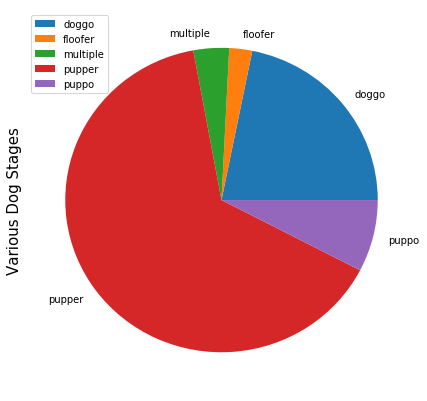

In [83]:
dog_count.plot(kind='pie',figsize=(7,7));
plt.ylabel("Various Dog Stages",fontsize=15)
plt.legend();

> **Observation :-** We observe from the above pie chart that the number of pupper is highest among all the different dog stages and occupies the highest percentage followed by doggo while the number of floofers are the lowest.

> **The Average rating of each stages of dogs:-**

> We will find the mean rating of each stage of dogs and plot a bar graph to see the differences in the mean rating of the various stages.

In [84]:
average = tweet_data_final.groupby('stage').rating_numerator.mean()
average

stage
doggo       11.879518
floofer     11.888889
multiple    11.357143
pupper      10.788857
puppo       12.103448
Name: rating_numerator, dtype: float64

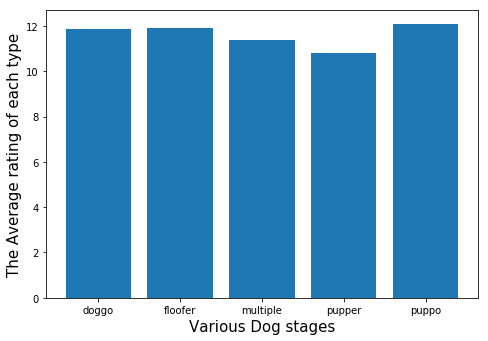

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(average.index.values,average.values)
plt.xlabel("Various Dog stages",fontsize=15)
plt.ylabel("The Average rating of each type",fontsize=15)
plt.show()

>**Observation :-** We observe from the above chart that the mean rating of almost all stages of dogs are nearly the same but still the pupper stage has the lowest mean rating among all the other stages while puppo stage has the highest mean rating above all the stages.

> **The Source distribution:-**

> We will find the number of each types of sources from which the tweet was posted and plot a bar graph to see the differences in the count of the posts done from the various sources.

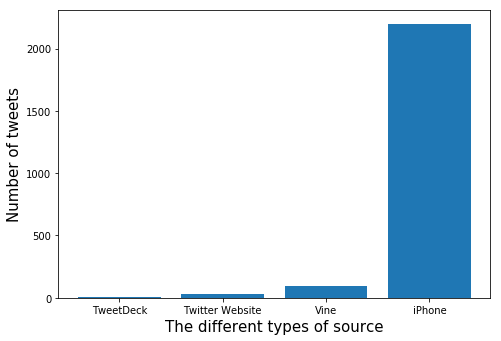

In [86]:
sorted_source = tweet_data_final['source'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_source.index,sorted_source.values)
plt.xlabel("The different types of source",fontsize=15)
plt.ylabel("Number of tweets",fontsize=15)
plt.show()

>**Observation :-** We can observe from the above bar chart that the highest number of tweets are posted from the iPhone followed by Vine-Make a Scene app while the lowest number of tweets are made from the TweetDeck. Although the Vine app is at 2nd position but the difference between iPhone and vine is very much.